In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1) data load

In [109]:
dataset = pd.read_csv('50_Startups.csv')

### 2) feature(X)와 actual value(y) 분리

In [110]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1:].values

In [111]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

### 3) training / test data 분리

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

### ※ state 열 One Hot Encoding

In [113]:
from sklearn.preprocessing import OneHotEncoder
mr_ohe = OneHotEncoder()
mr_ohe.fit(X_train[:,-1].reshape(-1,1))
Xst_train = mr_ohe.transform(X_train[:,-1].reshape(-1,1)).toarray()
Xst_test = mr_ohe.transform(X_test[:,-1].reshape(-1,1)).toarray()

In [114]:
print(Xst_train.shape)
print(Xst_test.shape)

(37, 3)
(13, 3)


In [115]:
# import seaborn as sns
# sns.pairplot(dataset)
# scatter plot을 통해 두 특징 사이의 관계성을 확인할 수 있음 (비례 또는 반비례)

### ※ one hot encoding 결과 결합

In [116]:
# 삭제
X_train = np.delete(X_train,-1,axis = 1)
# np.delete(ndarray, 삭제할 열 또는 행 index, axis = 0(행)/1(열))
X_train = np.concatenate((Xst_train,X_train),axis = 1)

In [117]:
X_test = np.delete(X_test,-1,axis = 1)
X_test = np.concatenate((Xst_test,X_test),axis = 1)

### 4) linear regression model 생성

In [118]:
from sklearn.linear_model import LinearRegression
mLR = LinearRegression()
mLR.fit(X_train, y_train)

LinearRegression()

In [96]:
X_train.shape

(37, 6)

In [119]:
# R&D 열만 (simple linear regression)
# X_train중 R&D 열만 추출
X_train_RD = X_train[:,3].reshape(-1,1) # 2D로 변경
SLR = LinearRegression()
SLR.fit(X_train_RD,y_train)

LinearRegression()

In [120]:
# R&D + Marketing 열만
# X_train중 R&D + Marketing 열만 추출
X_train_RM = X_train[:,[3,5]]
MLR2 = LinearRegression()
MLR2.fit(X_train_RM,y_train)

LinearRegression()

### 5) prediction

In [121]:
y_pred = mLR.predict(X_test)

In [122]:
y_sr_pred = SLR.predict(X_test[:,3].reshape(-1,1))

In [123]:
y_mr2_pred = MLR2.predict(X_test[:,[3,4]])

### 6) 시각화

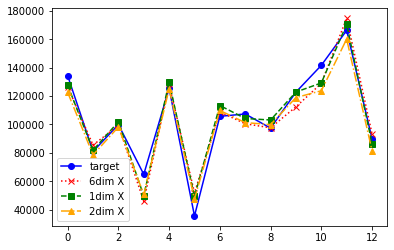

In [124]:
# x축: y_pred와 y_test에 대한 index
x = np.arange(len(y_test))
# np.arange(a,b,c): a부터 b까지(b는 미포함) c간격으로 1D array 생성
# 인자가 2개일 경우, c가 생략된 것으로 간주하고, c = 1
# 인자가 1개일 경우, a=0, c=1
plt.plot(x,y_test,marker='o',color='blue',label='target')
plt.plot(x,y_pred,marker='x',color='red',linestyle = ':',label='6dim X')
plt.plot(x,y_sr_pred,marker='s',color='green',linestyle = '--',label='1dim X')
plt.plot(x,y_mr2_pred,marker='^',color='orange',linestyle = '-.',label='2dim X')
plt.legend()

### 7) regression model w

In [127]:
# LinearRegression.coef_ (w0(bias)를 제외한 w 벡터)
# LinearRegression.intercept_ (w0(bias))
mlrW = mLR.coef_
mlrB = mLR.intercept_
print(mlrW)
print(mlrB)

[[ 2.06418088e+01  2.95993888e+02 -3.16635697e+02  8.10782371e-01
  -8.99234656e-02  2.99416290e-02]]
[56477.30030009]


In [128]:
slrW = SLR.coef_
slrB = SLR.intercept_
print(slrW)
print(slrB)

[[0.85572914]]
[48886.36129813]


In [129]:
mlr2W = MLR2.coef_
mlr2B = MLR2.intercept_
print(mlr2W)
print(mlr2B)

[[0.78383145 0.04017949]]
[45023.34161982]


In [130]:
MLR2.predict(X_test[:,[3,4]])

array([[122573.99296788],
       [ 78580.89258925],
       [ 98262.97255375],
       [ 50795.75951392],
       [125047.74388372],
       [ 47527.230974  ],
       [109859.78935385],
       [101316.75000677],
       [ 99917.17848709],
       [118929.93918762],
       [123712.36888734],
       [160083.61852388],
       [ 81627.28484924]])

In [133]:
print(mlr2W.shape)
print(X_test[:,[3,4]].shape)

(1, 2)
(13, 2)


In [136]:
# w * x + b를 수행
# matmul 이용 시, shape에 주의할 것
np.matmul(X_test[:,[3,4]],mlr2W.T) + mlr2B

array([[122573.9929678832],
       [78580.89258925023],
       [98262.97255375261],
       [50795.75951392039],
       [125047.74388372217],
       [47527.23097399628],
       [109859.78935384509],
       [101316.75000677237],
       [99917.17848709298],
       [118929.93918762293],
       [123712.36888734259],
       [160083.61852388337],
       [81627.28484923588]], dtype=object)

### normal equation

In [155]:
# X_train과 y_train으로 w 찾기
# 식은 강의자료 참고할 것

X_trainNE = np.concatenate((np.ones(shape=(len(X_train),1)),X_train),axis = 1)
X_trainNE = X_trainNE.astype(dtype=np.float64)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_trainNE.T,X_trainNE)),X_trainNE.T),y_train)
np.matmul(np.concatenate((np.ones(shape=(len(X_test),1)),X_test),axis = 1),w)

array([[33046.1861375108],
       [-7880.348126772792],
       [-219892.6708079355],
       [-807191.0050938439],
       [-724733.496067713],
       [-801108.1478771026],
       [-210358.66495369762],
       [7090.093419449087],
       [4250.14288195071],
       [-740631.6605835775],
       [-190351.87161184606],
       [-144522.915028791],
       [98.32738360677831]], dtype=object)

In [147]:
X_trainNE

array([[1.0, 120542.52, 148718.95],
       [1.0, 144372.41, 118671.85],
       [1.0, 134615.46, 147198.87],
       [1.0, 27892.92, 84710.77],
       [1.0, 1315.46, 115816.21],
       [1.0, 0.0, 135426.92],
       [1.0, 114523.61, 122616.84],
       [1.0, 123334.88, 108679.17],
       [1.0, 78013.11, 121597.55],
       [1.0, 77044.01, 99281.34],
       [1.0, 46426.07, 157693.92],
       [1.0, 61136.38, 152701.92],
       [1.0, 165349.2, 136897.8],
       [1.0, 22177.74, 154806.14],
       [1.0, 72107.6, 127864.55],
       [1.0, 55493.95, 103057.49],
       [1.0, 131876.9, 99814.71],
       [1.0, 65605.48, 153032.06],
       [1.0, 100671.96, 91790.61],
       [1.0, 28663.76, 127056.21],
       [1.0, 162597.7, 151377.59],
       [1.0, 78389.47, 153773.43],
       [1.0, 153441.51, 101145.55],
       [1.0, 15505.73, 127382.3],
       [1.0, 46014.02, 85047.44],
       [1.0, 67532.53, 105751.03],
       [1.0, 28754.33, 118546.05],
       [1.0, 101913.08, 110594.11],
       [1.0, 73994.56, 122